A **perceptron** is one of the simplest types of artificial neural network models — essentially the *grandparent* of modern deep learning architectures. It was introduced by **Frank Rosenblatt in 1958** as a computational model for binary classification, inspired by how biological neurons work.

---

## **1. Definition**

A perceptron takes several input signals (numerical values), applies **weights**, sums them up, passes the sum through an **activation function**, and produces an output (usually 0 or 1).

Mathematically:

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$

Where:

* $x_i$ = input features
* $w_i$ = weights associated with inputs
* $b$ = bias term (shifts the decision boundary)
* $f(\cdot)$ = activation function (e.g., step function in the classic perceptron)
* $y$ = output (0 or 1 in binary classification)

---

## **2. Structure of a Perceptron**

Think of it like a small pipeline:

1. **Inputs** — $x_1, x_2, x_3, \dots, x_n$ (features from your dataset)
2. **Weights** — Each input has an associated weight $w_1, w_2, \dots, w_n$ (learned during training)
3. **Summation Function** — Adds up the weighted inputs plus the bias:

   $$
   z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
   $$
4. **Activation Function** — In the original perceptron, this was a **step function**:

   $$
   f(z) =
   \begin{cases}
   1 & \text{if } z \geq 0 \\
   0 & \text{if } z < 0
   \end{cases}
   $$
5. **Output** — The decision (class label).

---

### **Diagram**

```
   x1 ----[w1]----
   x2 ----[w2]---->  Σ (weighted sum + bias) ---> Activation ---> Output y
   x3 ----[w3]----
                  b
```

---

## **3. Learning Process**

The perceptron learns using the **Perceptron Learning Rule**:

1. Initialize weights and bias (usually small random values or zeros).
2. For each training sample:

   * Compute output $y$.
   * Compare with the true label $t$.
   * Update weights if prediction is wrong:

     $$
     w_i \leftarrow w_i + \eta (t - y) x_i
     $$

     $$
     b \leftarrow b + \eta (t - y)
     $$

     where $\eta$ is the learning rate.
3. Repeat until convergence or max iterations.

---

## **4. Limitations**

* **Linear separability**: Can only solve problems where classes are linearly separable (e.g., AND, OR gates) but **not** XOR.
* **No hidden layers**: It's a single-layer model.
* **Step function activation**: No gradient → cannot use gradient-based optimization.

---

## **5. Modern Perspective**

While a single perceptron is limited, **multi-layer perceptrons (MLPs)** with nonlinear activation functions form the foundation of modern deep neural networks.


## **1. Decision Boundary**

The **decision boundary** is the “line” (in 2D), “plane” (in 3D), or **hyperplane** (in higher dimensions) that separates different classes in the feature space.

For a perceptron, the boundary comes from the equation:

$$
w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b = 0
$$

* **One side of the boundary** → classified as Class 1 (output = 1)
* **Other side** → classified as Class 0 (output = 0)

Example in 2D:

* If we have 2 features $x_1, x_2$, the decision boundary is a **straight line**:

  $$
  w_1 x_1 + w_2 x_2 + b = 0
  $$

---

## **2. Step Function**

The **step function** in the original perceptron is the activation function. It turns the weighted sum into a binary decision.

Mathematically:

$$
f(z) =
\begin{cases}
1 & \text{if } z \geq 0 \\
0 & \text{if } z < 0
\end{cases}
$$

* **z** = $w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b$
* Acts like a switch — instantly “flips” output to 0 or 1 based on whether the sum crosses the boundary at 0.

In modern neural networks, we often use smoother alternatives like **sigmoid**, **tanh**, or **ReLU**, because the step function’s sudden jump makes it non-differentiable (bad for gradient descent).

---

## **3. Weight Initialization**

When initializing weights in a perceptron (or any neural network):

* **Different values** are generally used for each weight (small random numbers, often close to 0).
* If **all weights start the same**, every neuron in a network learns the same thing (symmetry problem), which prevents learning.
* Bias is also initialized to a small value (often 0 or small random).

For example:

```python
import numpy as np

# Initialize 3 weights randomly between -0.01 and 0.01
weights = np.random.uniform(-0.01, 0.01, size=3)  
bias = 0.0
```

Weights: [ 0.87317531 -0.85660976], Bias: -0.24141471676881812


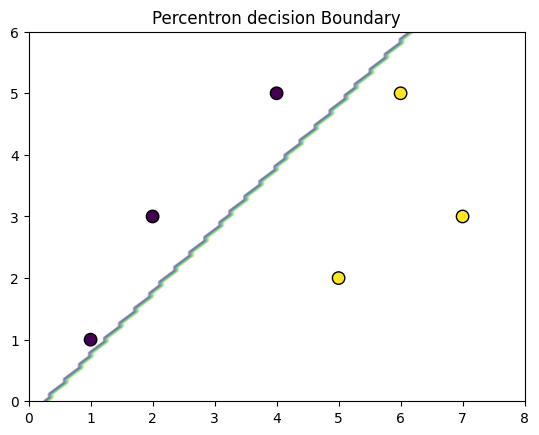

Prediction for point [3 4]: Class 0


In [19]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(z):
  return np.where(z>=0, 1, 0)

def train_percentron(X, y, lr=0.1, epochs=10):
  n_samples, n_features = X.shape
  weights = np.random.uniform(-0.5, 0.5, size=n_features)
  bias = np.random.uniform(-0.5, 0.5)

  for _ in range(epochs):
    for xi, target in zip(X, y):
      z= np.dot(xi, weights) + bias
      y_pred = step_function(z)
      update = lr*(target-y_pred)
      weights+=update*xi
      bias+=update
  return weights, bias

def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    return step_function(z)

def plot_boundary(X, y, weights, bias):
  x_min, x_max=X[:,0].min()-1, X[:,0].max()+1
  y_min, y_max=X[:,1].min()-1, X[:,1].max()+1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  Z =step_function(np.dot(np.c_[xx.ravel(), yy.ravel()], weights)+bias)
  Z = Z.reshape(xx.shape)

  plt.contour(xx, yy, Z, alpha=0.3)
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=80)
  plt.title("Percentron decision Boundary")
  plt.show()

X = np.array([
    [2,3],
    [1,1],
    [4,5],
    [5,2],
    [6,5],
    [7,3],
])
y = np.array([0,0,0,1,1,1])

weights, bias = train_percentron(X, y, lr=0.1, epochs=30)

print(f"Weights: {weights}, Bias: {bias}")

plot_boundary(X, y, weights, bias)

new_point = np.array([3, 4])
pred = predict(new_point, weights, bias)
print(f"Prediction for point {new_point}: Class {pred}")